### Data Set Comparison

#### Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

#### DS-01

In [2]:
# Load DS-01
fake_news = pd.read_csv('./raw-data/raw-dataset-01/Fake.csv')
true_news = pd.read_csv('./raw-data/raw-dataset-01/True.csv')

# Create a single DataFrame for the separated datasets
fake_news['label'] = 0  # 0 is for fake news
true_news['label'] = 1  # 1 is for true news
dataset_01 = pd.concat([fake_news, true_news], ignore_index=True)

# Save the merged dataset as "dataset-01.csv"
dataset_01.to_csv('./raw-data/dataset-01.csv', index=False)

# Print column labels for dataset
print("Column Labels for Dataset 01:")
print(dataset_01.columns.tolist())

# Print the distribution of news types in dataset
print("News Type Distribution in Dataset 01:")
print(dataset_01['label'].value_counts())

Column Labels for Dataset 01:
['title', 'text', 'subject', 'date', 'label']
News Type Distribution in Dataset 01:
label
0    23481
1    21417
Name: count, dtype: int64


#### DS-02

In [3]:
# Load DS-02
file_path = './raw-data/raw-dataset-02.csv'
dataset_02 = pd.read_csv(file_path, encoding='ISO-8859-1', low_memory=False)

# Check and rename the first column to 'index' if it's not already named so
dataset_02.columns = ['index'] + dataset_02.columns.tolist()[1:]

# Drop rows that are entirely empty and rows that do not start with a numeric index
dataset_02_cleaned = dataset_02.dropna(how='all')  # Drop rows where all elements are NaN
dataset_02_cleaned = dataset_02_cleaned[dataset_02_cleaned['index'].apply(lambda x: str(x).isdigit())]

# Keep only the explicitly named columns (assuming you know the column names you want to keep)
columns_to_keep = ['index', 'title', 'text', 'label']
dataset_02_cleaned = dataset_02_cleaned[columns_to_keep]

# Drop rows with any missing values in these columns
dataset_02_cleaned = dataset_02_cleaned.dropna()

# Convert 'label' to string, fliter and back to int
dataset_02_cleaned['label'] = dataset_02_cleaned['label'].astype(str)
dataset_02_cleaned = dataset_02_cleaned[dataset_02_cleaned['label'].isin(['0', '1'])]
dataset_02_cleaned['label'] = dataset_02_cleaned['label'].astype(int)

# Save the cleaned dataset or continue processing as needed
dataset_02_cleaned.to_csv('./raw-data/dataset-02.csv', index=False)

# Print column labels for dataset
print("Column Labels for Dataset 02:")
print(dataset_02_cleaned.columns.tolist())

# Print the distribution of news types in dataset
print("News Type Distribution in Dataset 02:")
print(dataset_02_cleaned['label'].value_counts())

Column Labels for Dataset 02:
['index', 'title', 'text', 'label']
News Type Distribution in Dataset 02:
label
1    36430
0    34975
Name: count, dtype: int64


#### DS-03

In [5]:
# Load DS-03
file_path = './raw-data/dataset-03.csv'
dataset_03 = pd.read_csv(file_path)

# Check and rename the first column to 'index' if it's not already named so
if dataset_03.columns[0] != 'index':
    dataset_03.columns = ['index'] + dataset_03.columns.tolist()[1:]

# Ensure 'label' column is numeric (0 for FAKE and 1 for TRUE)
dataset_03['label'] = dataset_03['label'].str.upper().map({'FAKE': 0, 'REAL': 1})

# Drop rows with any missing values in these columns
dataset_03_cleaned = dataset_03.dropna(subset=['title', 'text', 'label'])

# Save the cleaned dataset
dataset_03_cleaned.to_csv('./raw-data/dataset-03.csv', index=False)

# Print column labels for dataset
print("Column Labels for Dataset 03:")
print(dataset_03_cleaned.columns.tolist())

# Print the distribution of news types in dataset
print("News Type Distribution in Dataset 03:")
print(dataset_03_cleaned['label'].value_counts())

Column Labels for Dataset 03:
['index', 'title', 'text', 'label']
News Type Distribution in Dataset 03:
label
1    3171
0    3164
Name: count, dtype: int64


#### Dataset Comparison

/var/folders/5f/08blgxpd5sl3h4ddh8ymmw7c0000gn/T/ipykernel_90143/3738057710.py:28: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


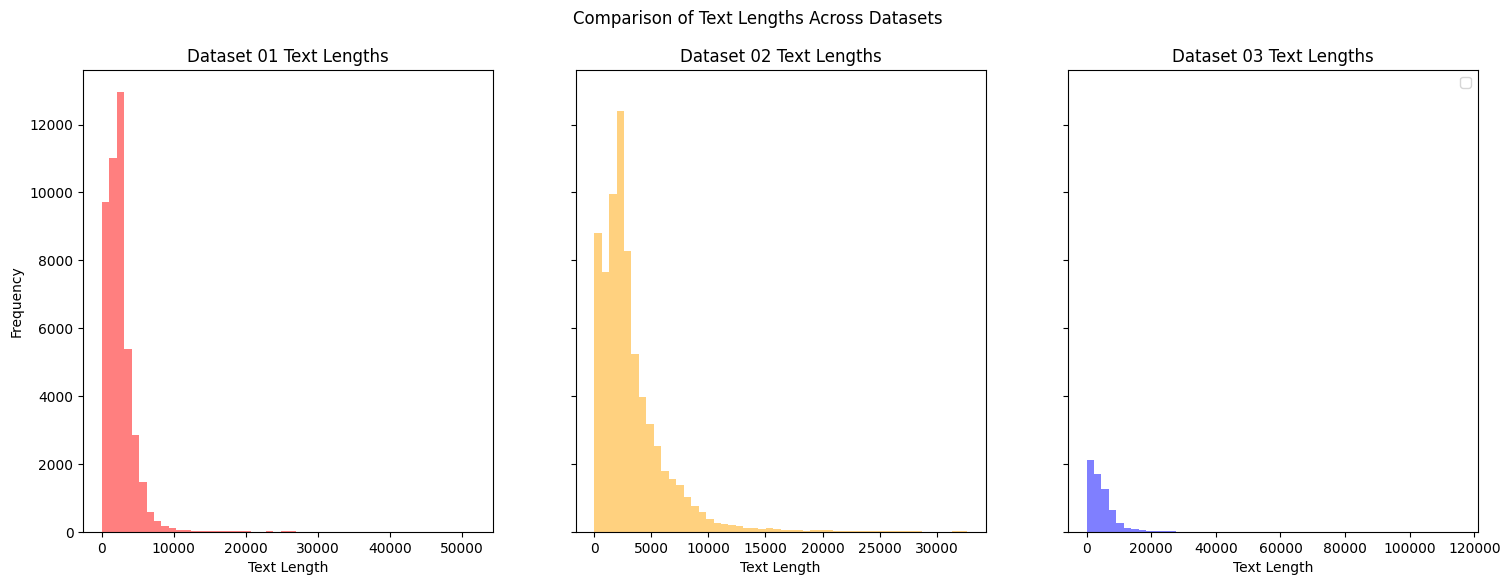

In [16]:
# Load the cleaned datasets
dataset_01 = pd.read_csv('./raw-data/dataset-01.csv')
dataset_02 = pd.read_csv('./raw-data/dataset-02.csv')
dataset_03 = pd.read_csv('./raw-data/dataset-03.csv')

# Compare article lengths
dataset_01['text_length'] = dataset_01['text'].apply(len)
dataset_02['text_length'] = dataset_02['text'].apply(len)
dataset_03['text_length'] = dataset_03['text'].apply(len)

# Plotting the distributions of text lengths side by side
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

axes[0].hist(dataset_01['text_length'], bins=50, alpha=0.5, color='red')
axes[0].set_title('Dataset 01 Text Lengths')
axes[0].set_xlabel('Text Length')
axes[0].set_ylabel('Frequency')

axes[1].hist(dataset_02['text_length'], bins=50, alpha=0.5, color='orange')
axes[1].set_title('Dataset 02 Text Lengths')
axes[1].set_xlabel('Text Length')

axes[2].hist(dataset_03['text_length'], bins=50, alpha=0.5, color='blue')
axes[2].set_title('Dataset 03 Text Lengths')
axes[2].set_xlabel('Text Length')

plt.suptitle('Comparison of Text Lengths Across Datasets')
plt.legend()
plt.show()

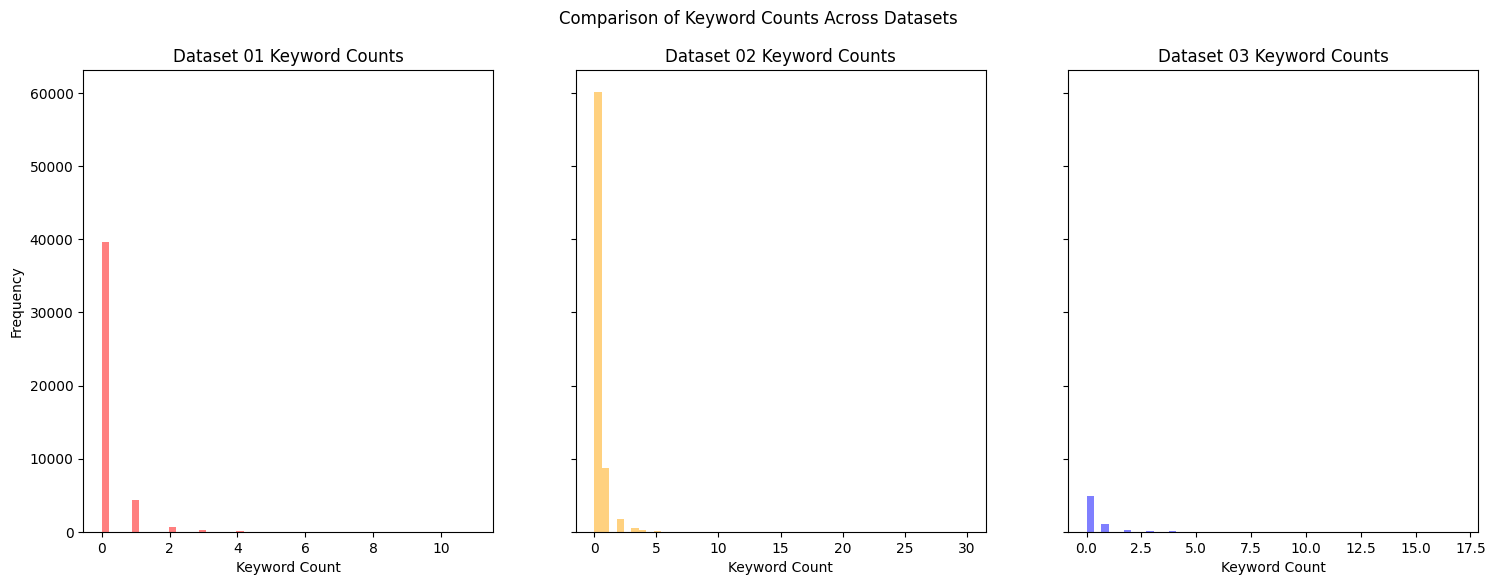

In [17]:
# Load the cleaned datasets
dataset_01 = pd.read_csv('./raw-data/dataset-01.csv')
dataset_02 = pd.read_csv('./raw-data/dataset-02.csv')
dataset_03 = pd.read_csv('./raw-data/dataset-03.csv')

# Function to count occurrences of specific keywords
def keyword_count(text, keywords):
    return sum(text.lower().count(keyword) for keyword in keywords)

keywords = ['warning', 'attention', 'alert', 'breaking', 'exclusive']

# Add columns for keyword counts
dataset_01['keyword_count'] = dataset_01['text'].apply(lambda x: keyword_count(x, keywords))
dataset_02['keyword_count'] = dataset_02['text'].apply(lambda x: keyword_count(x, keywords))
dataset_03['keyword_count'] = dataset_03['text'].apply(lambda x: keyword_count(x, keywords))

# Plotting the distributions of keyword counts side by side
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

axes[0].hist(dataset_01['keyword_count'], bins=50, alpha=0.5, color='red')
axes[0].set_title('Dataset 01 Keyword Counts')
axes[0].set_xlabel('Keyword Count')
axes[0].set_ylabel('Frequency')

axes[1].hist(dataset_02['keyword_count'], bins=50, alpha=0.5, color='orange')
axes[1].set_title('Dataset 02 Keyword Counts')
axes[1].set_xlabel('Keyword Count')

axes[2].hist(dataset_03['keyword_count'], bins=50, alpha=0.5, color='blue')
axes[2].set_title('Dataset 03 Keyword Counts')
axes[2].set_xlabel('Keyword Count')

plt.suptitle('Comparison of Keyword Counts Across Datasets')
plt.show()

In [18]:
# Load the cleaned datasets
dataset_01 = pd.read_csv('./raw-data/dataset-01.csv')
dataset_02 = pd.read_csv('./raw-data/dataset-02.csv')
dataset_03 = pd.read_csv('./raw-data/dataset-03.csv')

# Function to count occurrences of specific keywords
def keyword_count(text, keywords):
    return sum(text.lower().count(keyword) for keyword in keywords)

keywords = ['warning', 'attention', 'alert', 'breaking', 'exclusive']

# Add columns for keyword counts
dataset_01['keyword_count'] = dataset_01['text'].apply(lambda x: keyword_count(x, keywords))
dataset_02['keyword_count'] = dataset_02['text'].apply(lambda x: keyword_count(x, keywords))
dataset_03['keyword_count'] = dataset_03['text'].apply(lambda x: keyword_count(x, keywords))

# Average number of keywords per article
avg_keywords_01 = dataset_01['keyword_count'].mean()
avg_keywords_02 = dataset_02['keyword_count'].mean()
avg_keywords_03 = dataset_03['keyword_count'].mean()

print(f"Average number of keywords in Dataset 01: {avg_keywords_01:.2f}")
print(f"Average number of keywords in Dataset 02: {avg_keywords_02:.2f}")
print(f"Average number of keywords in Dataset 03: {avg_keywords_03:.2f}")

# Comparing the number of articles containing any of the keywords
dataset_01['has_keyword'] = dataset_01['keyword_count'] > 0
dataset_02['has_keyword'] = dataset_02['keyword_count'] > 0
dataset_03['has_keyword'] = dataset_03['keyword_count'] > 0

keyword_articles_01 = dataset_01['has_keyword'].sum()
keyword_articles_02 = dataset_02['has_keyword'].sum()
keyword_articles_03 = dataset_03['has_keyword'].sum()

print(f"Number of articles containing any keyword in Dataset 01: {keyword_articles_01}")
print(f"Number of articles containing any keyword in Dataset 02: {keyword_articles_02}")
print(f"Number of articles containing any keyword in Dataset 03: {keyword_articles_03}")

Average number of keywords in Dataset 01: 0.14
Average number of keywords in Dataset 02: 0.21
Average number of keywords in Dataset 03: 0.35
Number of articles containing any keyword in Dataset 01: 5209
Number of articles containing any keyword in Dataset 02: 11215
Number of articles containing any keyword in Dataset 03: 1499


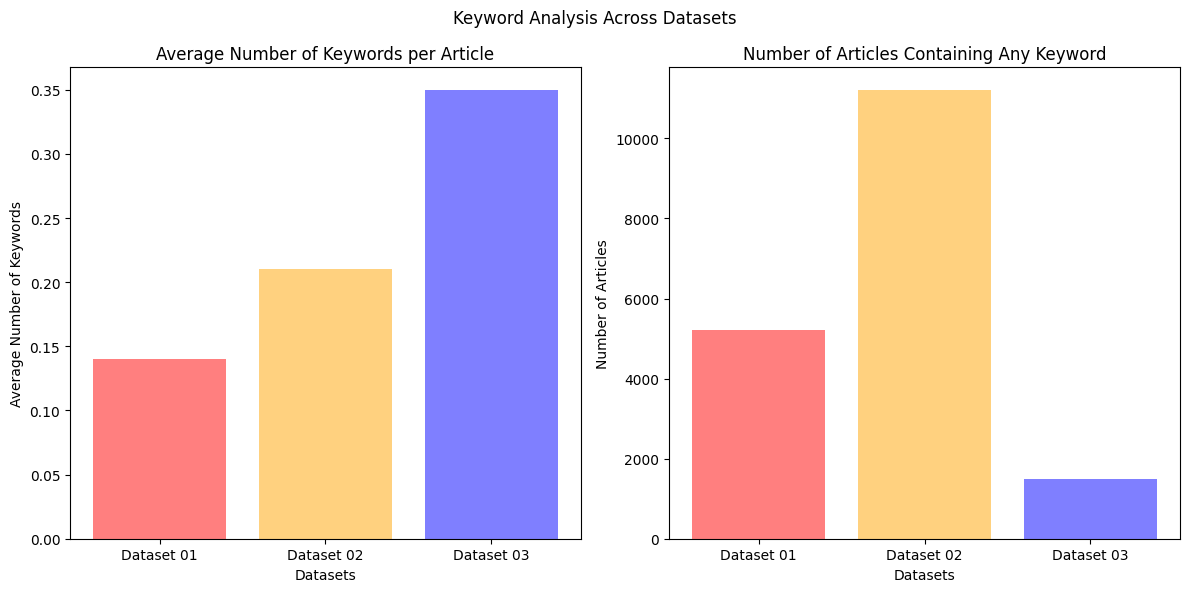

In [21]:
import matplotlib.pyplot as plt

# Data for visualization
datasets = ['Dataset 01', 'Dataset 02', 'Dataset 03']
avg_keywords = [0.14, 0.21, 0.35]
articles_with_keywords = [5209, 11215, 1499]

# Define colors to match the previous plots
colors = ['red', 'orange', 'blue']

# Plotting average number of keywords per article
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.bar(datasets, avg_keywords, color=colors, alpha=0.5)
plt.title('Average Number of Keywords per Article')
plt.xlabel('Datasets')
plt.ylabel('Average Number of Keywords')

# Plotting number of articles containing any keyword
plt.subplot(1, 2, 2)
plt.bar(datasets, articles_with_keywords, color=colors, alpha=0.5)
plt.title('Number of Articles Containing Any Keyword')
plt.xlabel('Datasets')
plt.ylabel('Number of Articles')

plt.suptitle('Keyword Analysis Across Datasets')
plt.tight_layout()
plt.show()


In [44]:
import os
import platform
import socket
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')

-----------------------------------
POSIX
Darwin | 23.5.0
Datetime: 2024-05-28 16:22:59
Python Version: 3.12.1
-----------------------------------
